In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [114]:
df = pd.read_csv('UpdatedResumeDataSet.csv')

In [115]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [116]:
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [117]:
df.shape

(962, 2)

In [118]:
df.info

<bound method DataFrame.info of          Category                                             Resume
0    Data Science  Skills * Programming Languages: Python (pandas...
1    Data Science  Education Details \r\nMay 2013 to May 2017 B.E...
2    Data Science  Areas of Interest Deep Learning, Control Syste...
3    Data Science  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4    Data Science  Education Details \r\n MCA   YMCAUST,  Faridab...
..            ...                                                ...
957       Testing  Computer Skills: â¢ Proficient in MS office (...
958       Testing  â Willingness to accept the challenges. â ...
959       Testing  PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...
960       Testing  COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...
961       Testing  Skill Set OS Windows XP/7/8/8.1/10 Database MY...

[962 rows x 2 columns]>

In [119]:
df.isnull().sum()

Category    0
Resume      0
dtype: int64

In [120]:
df.duplicated().sum()

796

In [121]:
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

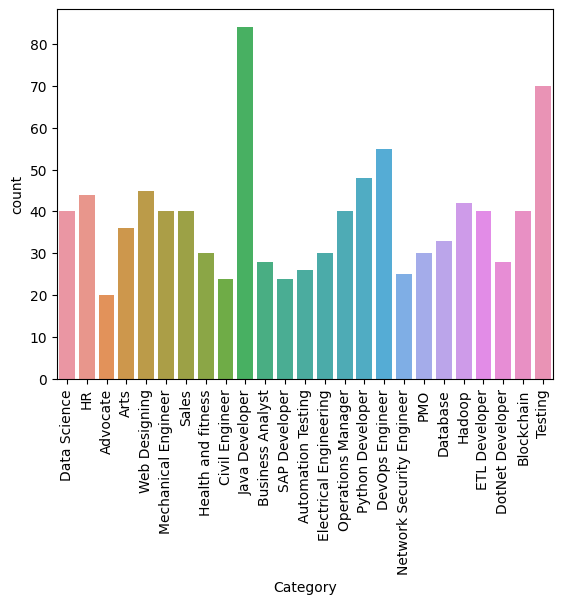

In [122]:
sns.countplot(x='Category', data=df)
plt.xticks(rotation=90)
plt.show()

In [123]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [124]:
import re
def cleanResume(txt):
    cleanText = re.sub('http\S+\s', ' ', txt)
    cleanText = re.sub('RT|cc', ' ', cleanText)
    cleanText = re.sub('#\S+\s', ' ', cleanText)
    cleanText = re.sub('@\S+', '  ', cleanText)  
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText) 
    cleanText = re.sub('\s+', ' ', cleanText)
    return cleanText

In [125]:
df['Resume'] = df['Resume'].apply(lambda x: cleanResume(x))

In [126]:
df['Resume']

0      Skills Programming Languages Python pandas num...
1      Education Details May 2013 to May 2017 B E UIT...
2      Areas of Interest Deep Learning Control System...
3      Skills R Python SAP HANA Tableau SAP HANA SQL ...
4      Education Details MCA YMCAUST Faridabad Haryan...
                             ...                        
957    Computer Skills Proficient in MS office Word B...
958     Willingness to a ept the challenges Positive ...
959    PERSONAL SKILLS Quick learner Eagerness to lea...
960    COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...
961    Skill Set OS Windows XP 7 8 8 1 10 Database MY...
Name: Resume, Length: 962, dtype: object

In [127]:
df['Resume'] = df['Resume'].apply(lambda x: x.lower())
df['Resume']

0      skills programming languages python pandas num...
1      education details may 2013 to may 2017 b e uit...
2      areas of interest deep learning control system...
3      skills r python sap hana tableau sap hana sql ...
4      education details mca ymcaust faridabad haryan...
                             ...                        
957    computer skills proficient in ms office word b...
958     willingness to a ept the challenges positive ...
959    personal skills quick learner eagerness to lea...
960    computer skills software knowledge ms power po...
961    skill set os windows xp 7 8 8 1 10 database my...
Name: Resume, Length: 962, dtype: object

In [128]:
import nltk

In [129]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [130]:
def stem(text):
    y = []

    for i in text.split():
        y.append(ps.stem(i))
        
    return " ".join(y)
        

In [131]:
df['Resume'] = df["Resume"].apply(stem)

In [132]:
df['Resume']

0      skill program languag python panda numpi scipi...
1      educ detail may 2013 to may 2017 b e uit rgpv ...
2      area of interest deep learn control system des...
3      skill r python sap hana tableau sap hana sql s...
4      educ detail mca ymcaust faridabad haryana data...
                             ...                        
957    comput skill profici in ms offic word basic ex...
958    willing to a ept the challeng posit think good...
959    person skill quick learner eager to learn new ...
960    comput skill softwar knowledg ms power point m...
961    skill set os window xp 7 8 8 1 10 databas mysq...
Name: Resume, Length: 962, dtype: object

In [133]:
df['Resume'][0]

'skill program languag python panda numpi scipi scikit learn matplotlib sql java javascript jqueri machin learn regress svm na ve bay knn random forest decis tree boost techniqu cluster analysi word embed sentiment analysi natur languag process dimension reduct topic model lda nmf pca neural net databas visual mysql sqlserver cassandra hbase elasticsearch d3 js dc js plotli kibana matplotlib ggplot tableau other regular express html css angular 6 logstash kafka python flask git docker comput vision open cv and understand of deep learn educ detail data scienc assur associ data scienc assur associ ernst young llp skill detail javascript exprienc 24 month jqueri exprienc 24 month python exprienc 24 monthscompani detail compani ernst young llp descript fraud investig and disput servic assur technolog assist review tar technolog assist review assist in a eler the review process and run analyt and gener report core member of a team help in develop autom review platform tool from scratch for 

In [137]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(stop_words='english')

In [138]:
vectors = cv.fit_transform(df['Resume']).toarray()

In [139]:
vectors.shape

(962, 5404)

In [140]:
cv.get_feature_names_out()

array(['000', '01', '017', ..., 'zone', 'zookeep', 'zz'], dtype=object)

In [141]:
from sklearn.model_selection import train_test_split

In [143]:
X_train, X_test, y_train, y_test = train_test_split(vectors, df['Category'], test_size=0.2, random_state=42)

In [145]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [146]:
# 1. Train KNeighborsClassifier
knn_model = OneVsRestClassifier(KNeighborsClassifier())
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
print("\nKNeighborsClassifier Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")


KNeighborsClassifier Results:
Accuracy: 0.9845


In [147]:
# 2. Train SVC
svc_model = OneVsRestClassifier(SVC())
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)
print("\nSVC Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svc):.4f}")


SVC Results:
Accuracy: 0.9948


In [149]:
# 2. Train Random Forest
rf_model = OneVsRestClassifier(RandomForestClassifier())
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("\nRandomForestClassifier Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")


RandomForestClassifier Results:
Accuracy: 0.9948


In [150]:
import pickle
pickle.dump(cv,open('tfidf.pkl','wb'))
pickle.dump(svc_model, open('clf.pkl', 'wb'))